# Data Cleaning

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv

### Loading the Csvs and combining into a single dataframe

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
df = pd.read_csv(open(cur_path+'/Data2017_Uncleaned.csv','rU'), encoding='utf-8')

### CLEANING

In [5]:
df.shape

(4276457, 109)

### Getting rid of columns having 98% or more missing data

In [6]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

62

In [7]:
d = df[features]

In [8]:
#d[['UniqueCarrier','AirlineID','Carrier','TailNum','FlightNum']]
#d[['OriginAirportID','OriginAirportSeqID','OriginCityMarketID','Origin','OriginCityName','OriginState','OriginStateName']]
#d[['CRSDepTime','DepTime','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelayMinutes','ArrDel15','CRSElapsedTime','ActualElapsedTime']]

In [9]:
d.columns

Index(['Year', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestAirportID',
       'DestWac', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled',
       'Diverted', 'Flights', 'DistanceGroup', 'CRSDepTime', 'OriginWac',
       'Distance', 'OriginStateFips', 'FlightDate', 'DayOfWeek', 'DayofMonth',
       'Month', 'Quarter', 'Carrier', 'AirlineID', 'OriginStateName',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'FlightNum', 'UniqueCarrier',
       'DivAirportLandings', 'CRSElapsedTime', 'TailNum', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'WheelsOff', 'TaxiOut', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'ActualElapsedTime', 'AirTime', 'ArrDelay',
       'ArrivalDelayGroups', 'NASDelay', 'CarrierDelay', 'WeatherDelay',
       'SecurityDelay', 'LateAircraftDelay

In [10]:
d.isnull().sum()

Year                          0
DestAirportSeqID              0
DestCityMarketID              0
Dest                          0
DestCityName                  0
DestState                     0
DestStateFips                 0
DestStateName                 0
DestAirportID                 0
DestWac                       0
DepTimeBlk                    0
CRSArrTime                    0
ArrTimeBlk                    0
Cancelled                     0
Diverted                      0
Flights                       0
DistanceGroup                 0
CRSDepTime                    0
OriginWac                     0
Distance                      0
OriginStateFips               0
FlightDate                    0
DayOfWeek                     0
DayofMonth                    0
Month                         0
Quarter                       0
Carrier                       0
AirlineID                     0
OriginStateName               0
OriginAirportID               0
                         ...   
Origin  

### Taking only the columns relevant for the delay

In [11]:
#dt = d[['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate','UniqueCarrier','AirlineID','Carrier','TailNum','FlightNum','OriginAirportID','Origin','Dest','CRSDepTime','DepTime','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelayMinutes','ArrDel15','CRSElapsedTime','ActualElapsedTime','DestAirportID','OriginCityName','OriginState','OriginStateName','DestCityName','DestState','DestStateName','Cancelled','TaxiOut','TaxiIn','WheelsOff','WheelsOn','Diverted','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

In [12]:
pp = features.tolist()
p = ['DivAirportLandings','TailNum','Carrier','OriginAirportSeqID','OriginCityMarketID','OriginStateFips','OriginWac','DestAirportSeqID','DestCityMArketID','DestStateFips','DestWac','DepTimeBlk','SecurityDelay','LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay',
       'CancellationCode']
for i in p:
    if i in pp:
        pp.remove(i)

In [13]:
dt= d[pp]

In [14]:
len(dt.columns)

45

In [15]:
dt.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'DestAirportID', 'CRSArrTime', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'Flights', 'DistanceGroup', 'CRSDepTime',
       'Distance', 'FlightDate', 'DayOfWeek', 'DayofMonth', 'Month', 'Quarter',
       'AirlineID', 'OriginStateName', 'OriginAirportID', 'Origin',
       'OriginCityName', 'OriginState', 'FlightNum', 'UniqueCarrier',
       'CRSElapsedTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'WheelsOn', 'TaxiIn',
       'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'ActualElapsedTime',
       'AirTime', 'ArrDelay', 'ArrivalDelayGroups'],
      dtype='object')

In [16]:
dt.shape

(4276457, 45)

In [17]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
DestAirportID               0
CRSArrTime                  0
ArrTimeBlk                  0
Cancelled                   0
Diverted                    0
Flights                     0
DistanceGroup               0
CRSDepTime                  0
Distance                    0
FlightDate                  0
DayOfWeek                   0
DayofMonth                  0
Month                       0
Quarter                     0
AirlineID                   0
OriginStateName             0
OriginAirportID             0
Origin                      0
OriginCityName              0
OriginState                 0
FlightNum                   0
UniqueCarrier               0
CRSElapsedTime              7
DepTime                 70648
DepDelay                70672
DepDelayMinutes         70672
DepDel15                70672
DepartureD

In [18]:
dt['Flight_Status'] = 0
dt.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
dt.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
dt.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
dt['Flight_Status'] = dt['Flight_Status'].astype(int)
dt['Status'] = np.where(dt['Flight_Status']==1,'Delayed', 'On Time')

In [19]:
dt = dt[dt['Cancelled']!=1]

In [20]:
dt.shape

(4203809, 47)

In [21]:
4276457-4203809

72648

In [22]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
DestAirportID               0
CRSArrTime                  0
ArrTimeBlk                  0
Cancelled                   0
Diverted                    0
Flights                     0
DistanceGroup               0
CRSDepTime                  0
Distance                    0
FlightDate                  0
DayOfWeek                   0
DayofMonth                  0
Month                       0
Quarter                     0
AirlineID                   0
OriginStateName             0
OriginAirportID             0
Origin                      0
OriginCityName              0
OriginState                 0
FlightNum                   0
UniqueCarrier               0
CRSElapsedTime              0
DepTime                     0
DepDelay                    0
DepDelayMinutes             0
DepDel15                    0
DepartureD

In [23]:
dt = dt[dt['ArrTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ActualElapsedTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ArrDel15'].notnull()]

In [24]:
dt.shape

(4193597, 47)

In [25]:
dt.isnull().sum()

Year                    0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateName           0
DestAirportID           0
CRSArrTime              0
ArrTimeBlk              0
Cancelled               0
Diverted                0
Flights                 0
DistanceGroup           0
CRSDepTime              0
Distance                0
FlightDate              0
DayOfWeek               0
DayofMonth              0
Month                   0
Quarter                 0
AirlineID               0
OriginStateName         0
OriginAirportID         0
Origin                  0
OriginCityName          0
OriginState             0
FlightNum               0
UniqueCarrier           0
CRSElapsedTime          0
DepTime                 0
DepDelay                0
DepDelayMinutes         0
DepDel15                0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
WheelsOn                0
TaxiIn                  0
ArrTime     

In [26]:
del dt['Cancelled']

In [27]:
dt.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'DestAirportID', 'CRSArrTime', 'ArrTimeBlk',
       'Diverted', 'Flights', 'DistanceGroup', 'CRSDepTime', 'Distance',
       'FlightDate', 'DayOfWeek', 'DayofMonth', 'Month', 'Quarter',
       'AirlineID', 'OriginStateName', 'OriginAirportID', 'Origin',
       'OriginCityName', 'OriginState', 'FlightNum', 'UniqueCarrier',
       'CRSElapsedTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'WheelsOn', 'TaxiIn',
       'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'ActualElapsedTime',
       'AirTime', 'ArrDelay', 'ArrivalDelayGroups', 'Flight_Status', 'Status'],
      dtype='object')

In [28]:
# Lookup Tables

In [29]:
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)

In [30]:
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = origin.set_index('Code').T.to_dict('list')
carrier_dict = origin.set_index('Code').T.to_dict('list')

In [31]:
origin_dict['DFW'][0].split(',')[0]

'Dallas/Fort Worth'

In [32]:
dd = dt

In [35]:
dd.shape

(4193597, 46)

### Removing Outliers

In [40]:
dt[dt.DepDelayMinutes>1500].shape

(24, 46)

In [41]:
dt[dt.ArrDelayMinutes>1500].shape

(22, 46)

In [42]:
dd = dd[dd.DepDelayMinutes<1500]

In [43]:
dd = dd[dd.ArrDelayMinutes<1500]

In [44]:
dd.shape

(4193573, 46)

In [47]:
dd[(dd.Month==9) & (dd.ArrDelayMinutes>1300)]

,Year,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestAirportID,CRSArrTime,ArrTimeBlk,Diverted,...,TaxiIn,ArrTime,ArrDel15,ArrDelayMinutes,ActualElapsedTime,AirTime,ArrDelay,ArrivalDelayGroups,Flight_Status,Status
3942797,2017,32575,LAX,"Los Angeles, CA",CA,California,12892,1815,1800-1859,0.0,...,19.0,1736.0,1.0,1401.0,319.0,287.0,1401.0,12.0,1,Delayed
4027960,2017,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,11298,927,0900-0959,0.0,...,11.0,728.0,1.0,1321.0,139.0,113.0,1321.0,12.0,1,Delayed


In [48]:
dd = dd.drop((dd.Month==9) & (dd.ArrDelayMinutes>1300))

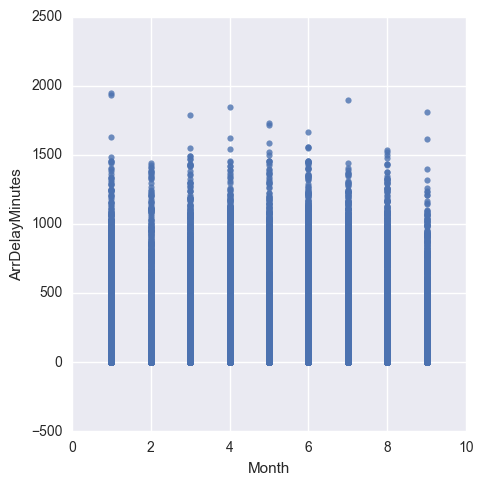

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dt, fit_reg=False)
plt.show()

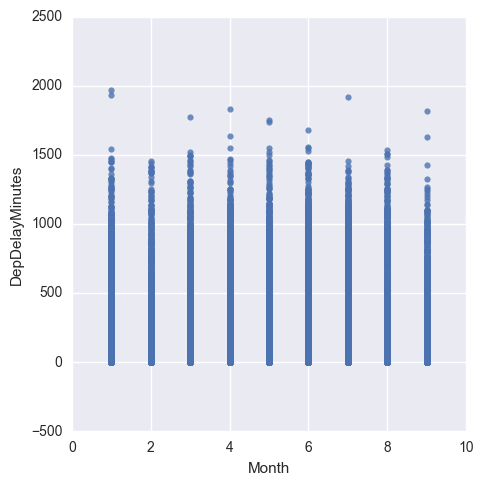

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dt, fit_reg=False)
plt.show()

In [50]:
dd.isnull().sum()

Year                    0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateName           0
DestAirportID           0
CRSArrTime              0
ArrTimeBlk              0
Diverted                0
Flights                 0
DistanceGroup           0
CRSDepTime              0
Distance                0
FlightDate              0
DayOfWeek               0
DayofMonth              0
Month                   0
Quarter                 0
AirlineID               0
OriginStateName         0
OriginAirportID         0
Origin                  0
OriginCityName          0
OriginState             0
FlightNum               0
UniqueCarrier           0
CRSElapsedTime          0
DepTime                 0
DepDelay                0
DepDelayMinutes         0
DepDel15                0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
WheelsOn                0
TaxiIn                  0
ArrTime                 0
ArrDel15    

In [51]:
dd.to_csv(cur_path+'/Data2017_Cleaned.csv', index = False)